In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from src.problem import load_model

In [3]:
data_dir = Path('../data/raw/instances/3_anonymous')

instances_fps = list(data_dir.glob('valid/*.mps.gz'))
len(instances_fps)

20

13.551020408163266


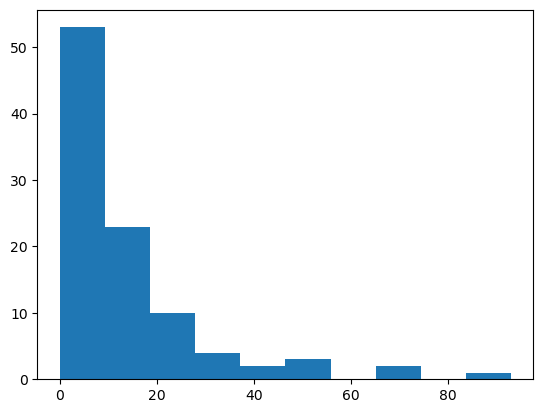

In [20]:
sols_dir = Path('../data/interim/solutions/3_anonymous/')

instances_fps = list(data_dir.glob('train/*.mps.gz'))
n_sols = list()
for instance_fp in instances_fps:
    instance_name = instance_fp.name.split(".")[0]
    solutions_fps = list(sols_dir.glob(f'{instance_name}_*.sol.gz'))
    n_sols.append(len(solutions_fps))
print(np.mean(n_sols))

plt.hist(n_sols)
plt.show()

In [21]:
instance_fp = np.random.choice(instances_fps)
print(instance_fp.name)

m = load_model(instance_fp)
m.setRealParam('limits/time', 60.0)
m.setIntParam('limits/maxsol', 500)
m.setBoolParam('constraints/countsols/collect', True)

m.optimize()

anonymous_0.mps.gz
original problem has 92261 variables (36960 bin, 0 int, 0 impl, 55301 cont) and 126621 constraints
presolving:
(round 1, fast)       58283 del vars, 89047 del conss, 619 add conss, 111586 chg bounds, 139 chg sides, 100 chg coeffs, 0 upgd conss, 1464 impls, 2142 clqs
(round 2, fast)       83700 del vars, 115326 del conss, 623 add conss, 112107 chg bounds, 139 chg sides, 100 chg coeffs, 0 upgd conss, 1464 impls, 1917 clqs
(round 3, fast)       83962 del vars, 115787 del conss, 631 add conss, 112250 chg bounds, 139 chg sides, 100 chg coeffs, 0 upgd conss, 1464 impls, 1910 clqs
(round 4, fast)       84034 del vars, 115910 del conss, 632 add conss, 112288 chg bounds, 139 chg sides, 100 chg coeffs, 0 upgd conss, 1464 impls, 1886 clqs
(round 5, fast)       84058 del vars, 115946 del conss, 632 add conss, 112293 chg bounds, 139 chg sides, 100 chg coeffs, 0 upgd conss, 1464 impls, 1885 clqs
   (0.3s) running MILP presolver
   (0.5s) MILP presolver (55 rounds): 1370 aggregatio

In [24]:
t, x = m.get_primal_curve()

primal_t, primal_x = m.get_primal_curve()
dual_t, dual_x = m.get_dual_curve()

np.savez('test.npz', primal_t=primal_t,
            primal_x=primal_x, dual_t=dual_t, dual_x=dual_x)

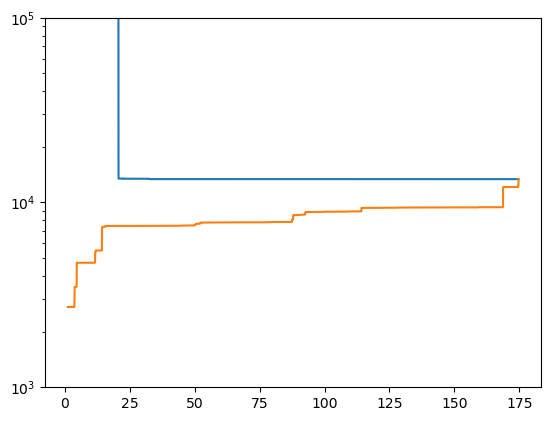

In [34]:
bounds = np.load('../data/interim/solutions/3_anonymous/anonymous_6_bounds.npz')

plt.plot(bounds['primal_t'], bounds['primal_x'], label='primal')
plt.plot(bounds['dual_t'], bounds['dual_x'], label='dual')

plt.ylim(1e3, 1e5)
plt.yscale('log')

plt.show()

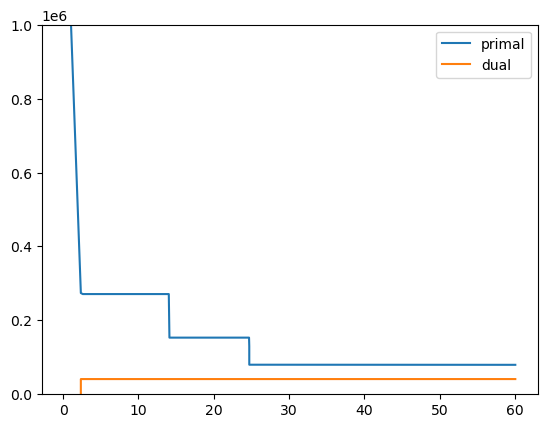

In [66]:
plt.plot(*m.get_primal_curve(), label='primal')
plt.plot(*m.get_dual_curve(), label='dual')
plt.ylim(0,1e6)

plt.legend()
plt.show()